### Homework 1 
### Sophie Wynn

**Problem 1**

In [16]:
# use the function  below to get dates for 2021
import numpy as np
import netCDF4 as nc
from datetime import datetime, timedelta

def get_2021_pier_data(date_start=None, date_end=None):
    """
    Return temperature, pressure, and time data from the 2020 pier record.

    Parameters:
    date_start (datetime): Start date for data retrieval (default: None, uses minimum date in dataset).
    date_end (datetime): End date for data retrieval (default: None, uses maximum date in dataset).

    Returns:
    dict: Dictionary containing time, temperature, pressure, and readme information.
    """

    file_path = file = 'http://sccoos.org/thredds/dodsC/autoss/scripps_pier-2021.nc'

    with nc.Dataset(file_path, 'r') as dataset:
        time = dataset.variables['time'][:]
        temperature = dataset.variables['temperature'][:]
        pressure = dataset.variables['pressure'][:]

    date0 = datetime(1970, 1, 1)
    dnum = np.array(time) / 3600 / 24 + date0.toordinal()

    if date_start is None:
        date_start = min(dnum)   #refers to the number of input vairbles if date start and end is not included then take the entire dataset
    if date_end is None:
        date_end = max(dnum)

    i1 = np.where((dnum > date_start) & (dnum < date_end))[0]

    pier = {
        'dnum': dnum[i1],
        'temperature': temperature[i1],
        'pressure': pressure[i1],
        'readme': '2021 Pier data, SIO221a, function Get2021PierData.py'
    }

    return pier

# Specify the date ranges in datetime format
date_start = datetime(2021, 1, 1, 0, 0, 0)
date_end = datetime(2021, 12, 31, 0, 0, 0)

# Convert dates to ordinal numbers (like MATLAB's datenum)
date_start_ordinal = date_start.toordinal()
date_end_ordinal = date_end.toordinal()

# Call the Python function to get pier data for the specified date range
pier_data2021 = get_2021_pier_data(date_start_ordinal, date_end_ordinal)


*Part A*

Text(0.5, 1.0, 'SIO Pier Sea Surface Temperature 2021')

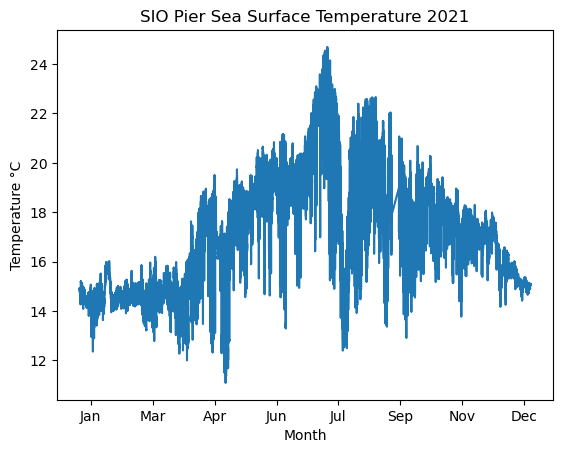

In [2]:
#read in the temperature data
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

temp2021 = pier_data2021['temperature']
dnum2021 = pier_data2021['dnum']
plt.plot(dnum2021,temp2021 )
# Set a specific date format for x-axis (e.g., "%b" for month abbreviation)
plt.gca().xaxis.set_major_formatter(DateFormatter('%b'))
plt.xlabel("Month")
plt.ylabel("Temperature °C")
plt.title("SIO Pier Sea Surface Temperature 2021")

**Observations:**
I see a seasonal trend where the temperature is generally warmer in the Summer (June, July August and into September), compared to Winter (December January February). Additonally there is a larger variance in temperature in the Summer than Winter, for example the temperature varies only by around 3-4 degrees Celcius in January and in June to July it the temperature varies my almost 10 degrees Celcius. 

***Part B***


In [3]:
print("Mean of 2021 Temperature", np.mean(temp2021), "°C")
print("Standard Deviation of 2021 Temperature", np.std(temp2021), "°C")
print("We expect to see a temperature of 17.3°C for the water off of the SIO pier in 2021, that temperature is expected to deviated by 2.4 °C")

Mean of 2021 Temperature 17.279812 °C
Standard Deviation of 2021 Temperature 2.4262009 °C
We expect to see a temperature of 17.3°C for the water off of the SIO pier in 2021, that temperature is expected to deviated by 2.4 °C


***Part C***

In [4]:
#empirical probability density function for sea surface temperature

# Parameters for the Gaussian distribution
mu = np.mean(temp2021)
sigma = np.std(temp2021)

# Generate data points for the Gaussian distribution
x = np.arange(10, 25, 0.1)
gaussian = 1.0 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

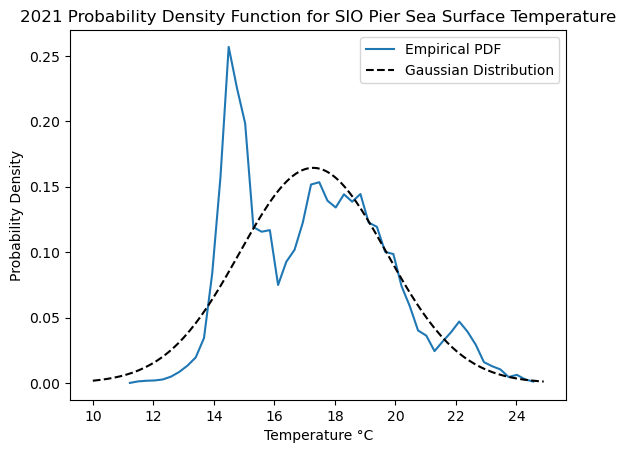

In [5]:
hist, bins = np.histogram(temp2021, bins=50, density=True)
bin_centers = (bins[:-1] + bins[1:]) / 2
plt.plot(bin_centers, hist, label='Empirical PDF', linestyle='-')
plt.plot(x, gaussian, 'k--', label='Gaussian Distribution')
plt.xlabel('Temperature °C')
plt.ylabel('Probability Density')
plt.title('2021 Probability Density Function for SIO Pier Sea Surface Temperature')
plt.legend()

***Part C Observations***
This look like a bimodal distribution, it has two peaks, one at around 15 degrees celsius and one at 18 degrees celsius. It does not represent a gaussian distribution very much, as seen above.  

**Problem 2**

In [6]:
# make a new function to give you mutilple years of data 

import numpy as np
from datetime import datetime
from netCDF4 import Dataset

def get_yearly_pier_data(year_start, year_end, date_start=None, date_end=None):
    """
    Return temperature, pressure, and time data for the specified year range.

    Parameters:
    year_start (int): Start year for data retrieval.
    year_end (int): End year for data retrieval.
    date_start (datetime): Start date for data retrieval (default: None, uses minimum date in dataset).
    date_end (datetime): End date for data retrieval (default: None, uses maximum date in dataset).

    Returns:
    dict: Dictionary containing time, temperature, pressure, and readme information.
    """

    # Check for valid year range
    if year_end < year_start:
        raise ValueError("Invalid year range. 'year_end' should be greater than or equal to 'year_start'.")

    # Construct the file path based on the specified year
    file_paths = ['http://sccoos.org/thredds/dodsC/autoss/scripps_pier-{}.nc'.format(year) for year in range(year_start, year_end + 1)]

    # Initialize arrays to store data
    all_time, all_temperature, all_pressure = [], [], []

    # Loop through each file and extract data
    for file_path in file_paths:
        with Dataset(file_path, 'r') as dataset:
            time = dataset.variables['time'][:]
            temperature = dataset.variables['temperature'][:]
            pressure = dataset.variables['pressure'][:]

        # Process time data
        date0 = datetime(1970, 1, 1)
        dnum = np.array(time) / 3600 / 24  + date0.toordinal()

        # Filter data based on date range
        if date_start is None:
            date_start = min(dnum)
        if date_end is None:
            date_end = max(dnum)

        i1 = np.where((dnum > date_start) & (dnum < date_end))[0]

        # Append data for this year
        all_time.append(dnum[i1])
        all_temperature.append(temperature[i1])
        all_pressure.append(pressure[i1])

    # Merge data from all years
    pier = {
        'dnum': np.concatenate(all_time),
        'temperature': np.concatenate(all_temperature),
        'pressure': np.concatenate(all_pressure),
        'readme': 'Pier data for years {} to {}, function get_yearly_pier_data'.format(year_start, year_end)
    }

    return pier


In [7]:
date_start = datetime(2005, 1, 1, 0, 0, 0)
date_end = datetime(2021, 12, 31, 0, 0, 0)

# Convert dates to ordinal numbers (like MATLAB's datenum)
date_start_ordinal = date_start.toordinal()
date_end_ordinal = date_end.toordinal()


SIO = get_yearly_pier_data(2005, 2021, date_start_ordinal, date_end_ordinal)

***Part A***

Text(0.5, 1.0, 'Raw SIO Pier Sea Surface Temperature 2005 - 2021 ')

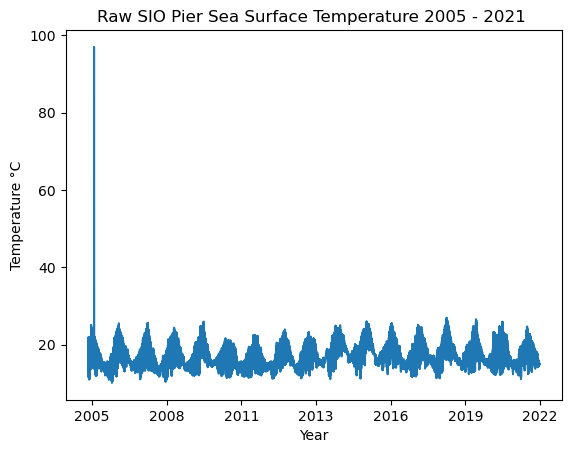

In [8]:
x = SIO['dnum']
#redo datnum vector by subtracting by 1970, due to python preferences 
date0 = datetime(1970, 1, 1)
x1 = x - date0.toordinal()
y = SIO['temperature']
plt.plot(x1, y)
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))
plt.xlabel("Year")
plt.ylabel("Temperature °C")
plt.title("Raw SIO Pier Sea Surface Temperature 2005 - 2021 ")


In [9]:
print('max temp', np.max(SIO['temperature']))

max temp 97.0


**Observations**
You can see a seasonal cycle in the plot above, where the temperature reaches a macimum in the middle of the year, ie summer, this was also seen in the 2021 temperature plot. See the 97 degree reading in 2005 this must because of instrument faliure, because the warmest sea surface 
temperature reading from the SIO pier is reported to be 25.9°C (78.6°F) in 2018. (https://scripps.ucsd.edu/news/highest-ever-seawater-temperature-recorded-scripps-pier#:~:text=The%20record%20of%2025.9%C2%B0,been%20set%20at%20the%20pier.)
 

Text(0.5, 1.0, 'Filtered SIO Pier Sea Surface Temperature 2005 - 2021 ')

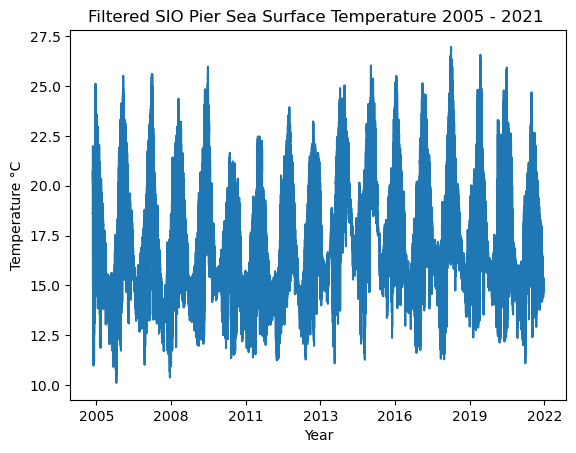

In [10]:
# Remove outlier/noise in the temperature dataset. 
temperature_threshold = 30 #hottest temperature allowed on the graph ( temp of 30 degrees on the pier should never been seen, especially temperatues above)

#select dates and temperature below 30 degrees
filtered_temperature = SIO['temperature'][SIO['temperature'] <= temperature_threshold]
filtered_dnum = SIO['dnum'][SIO['temperature'] <= temperature_threshold]

#redo datnum by subtracting by 1970, due to python preferences 
filtered_dnum = filtered_dnum - date0.toordinal()

plt.plot(filtered_dnum, filtered_temperature)
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))
plt.xlabel("Year")
plt.ylabel("Temperature °C")
plt.title("Filtered SIO Pier Sea Surface Temperature 2005 - 2021 ")


**Observations** This graph displays the temperature variance better, compared to Raw SIO Pier Sea Surface Temperature 2005 - 2021. I can see now that 2011 to 2013 record lower summer temperatures than the rest of the years


***Part B***

In [11]:
print("Mean of 2005 to 2021 Temperature", np.mean(filtered_temperature), "°C")
print("Standard Deviation of 2005 to 2021 Temperature", np.std(filtered_temperature), "°C")

Mean of 2005 to 2021 Temperature 17.79963 °C
Standard Deviation of 2005 to 2021 Temperature 2.7388155 °C


**Observations** This long term record has very similar mean, and standard deivation compared to our results in problem 1. I would consider these results to be more accurate compared to 2021, due to the larger number of samples, when looking at the climatological mean. 

Text(0.5, 1.0, 'August 2016')

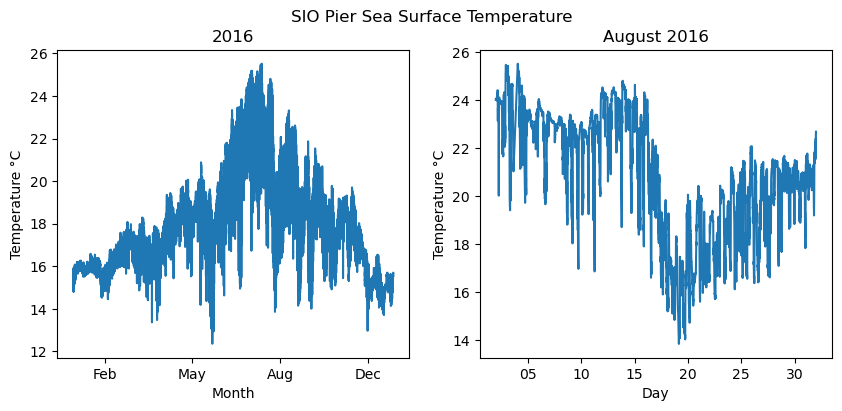

In [12]:
#Look at 2016
date_start = datetime(2016, 1, 1, 0, 0, 0)
date_end = datetime(2016, 12, 31, 0, 0, 0)

# Convert dates to Matlab datenum
date_start_ordinal = date_start.toordinal()
date_end_ordinal = date_end.toordinal()

#use the function to call the 
pier16 = get_yearly_pier_data(2016, 2016, date_start_ordinal, date_end_ordinal)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.suptitle("SIO Pier Sea Surface Temperature")
plt.plot(pier16['dnum'],pier16['temperature'])
plt.gca().xaxis.set_major_formatter(DateFormatter('%b'))
plt.xlabel("Month")
plt.ylabel("Temperature °C")
plt.title("2016")

#zoom into august 
Aug = np.where((pier16['dnum'] >= datetime(2016, 8, 1).toordinal()) &
                           (pier16['dnum'] <= datetime(2016, 8, 31).toordinal()))
plt.subplot(1, 2, 2)
plt.plot(pier16['dnum'][Aug], pier16['temperature'][Aug])
plt.gca().xaxis.set_major_formatter(DateFormatter('%d'))
plt.xlabel("Day")
plt.ylabel("Temperature °C")
plt.title("August 2016")

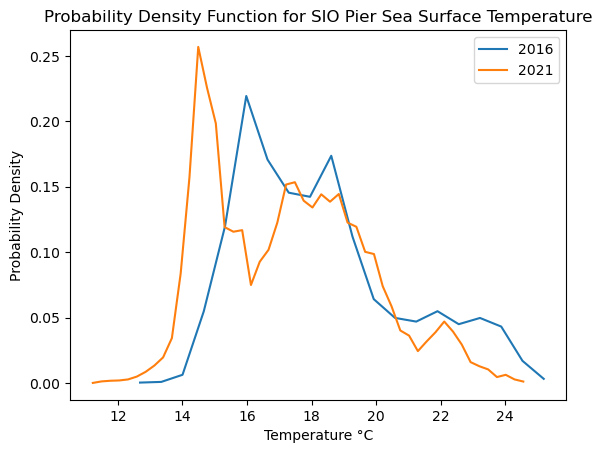

In [13]:
hist16, bins16 = np.histogram(pier16['temperature'], bins=20, density=True)
bin_centers16 = (bins16[:-1] + bins16[1:]) / 2
plt.plot(bin_centers16, hist16, label='2016', linestyle='-')
plt.plot(bin_centers, hist, label='2021', linestyle='-')
plt.legend()
plt.xlabel('Temperature °C')
plt.ylabel('Probability Density')
plt.title('Probability Density Function for SIO Pier Sea Surface Temperature')
plt.legend()

**Observations** 
When comparing the temperature in 2016 to 2021 looking at the PDF, the temperatures in 2016, blue are warmer than in 2021, red. Both PDF have a bimodal distrubtion, but 2021s in more distint. Ingeneral we can say you are more likely to encounter warmer water in 2016 than 2021. 

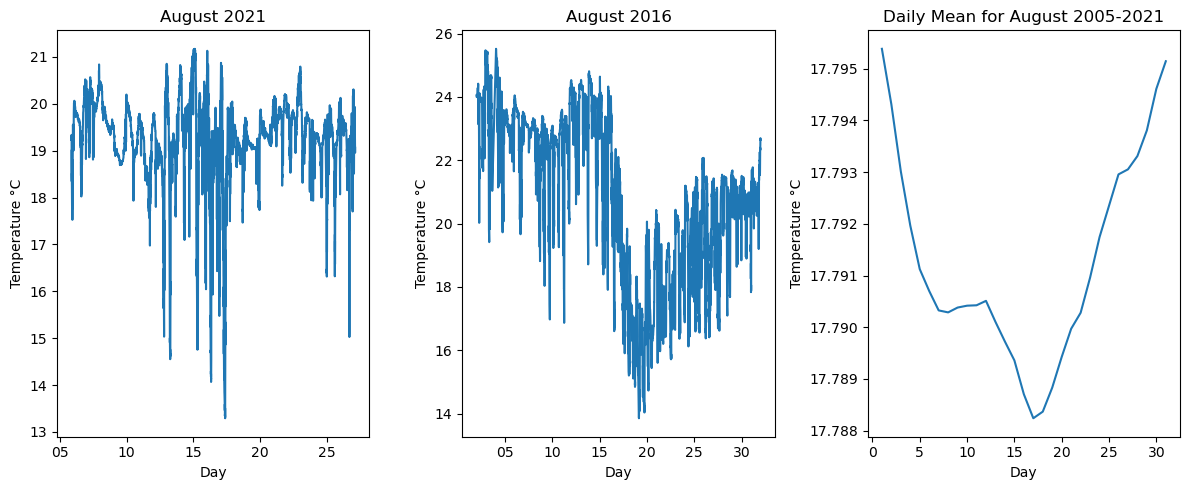

In [14]:
#zoom into august 
plt.figure(figsize=(12, 5))
plt.subplot(1,3,1)
Aug2021 = np.where((pier_data2021['dnum'] >= datetime(2016, 8, 1).toordinal()) &
                           (pier_data2021['dnum'] <= datetime(2016, 8, 31).toordinal()))
plt.plot(pier_data2021['dnum'][Aug], pier_data2021['temperature'][Aug])
plt.gca().xaxis.set_major_formatter(DateFormatter('%d'))
plt.xlabel("Day")
plt.ylabel("Temperature °C")
plt.title("August 2021")

plt.subplot(1,3,2)

plt.plot(pier16['dnum'][Aug], pier16['temperature'][Aug])
plt.gca().xaxis.set_major_formatter(DateFormatter('%d'))
plt.xlabel("Day")
plt.ylabel("Temperature °C")
plt.title("August 2016")

#Find average August Temp for 2005 to 2021

#assign and initials the august daily mean temperature arrays 

daily_avg_temperature = np.zeros(31)

# go through each day in august 1 to 31
for day in range(1, 32):
    # find where it is august in the SIO dataset
    indices = np.where((SIO['dnum'] >= datetime(2005, 8, day).toordinal()) &
                       (SIO['dnum'] <= datetime(2021, 8, day).toordinal()))

    # Calculate the mean temperature for that day
    daily_avg_temperature[day - 1] = np.mean(SIO['temperature'][indices])

# Plot the daily average temperature for August
plt.subplot(1,3,3)
days_of_august = np.arange(1, 32)
plt.plot(days_of_august, daily_avg_temperature)
plt.xlabel("Day")
plt.ylabel("Temperature °C")
plt.title("Daily Mean for August 2005-2021")
plt.tight_layout()

**Observations** To understand if August 2021 or August 2016, unusual I decided to look at the daily average temperature for August from 2005-2021, and it seems like, the water temperature tends to cool down in August.
When you look into the sea surface temperatures in August of 2016, we can see from the 15th to 20th day the water drastically decreases in temperature. And in 2021 the temperatures for August are much more consistent, which is not represented in the climatoigial mean, so August 2021 was unusual interms of the patter across time. The begining of August 2016 is much warmer than August 2021 and the mean of August, so you could say the first half of August 2016 is unusualy warm

***Part C***

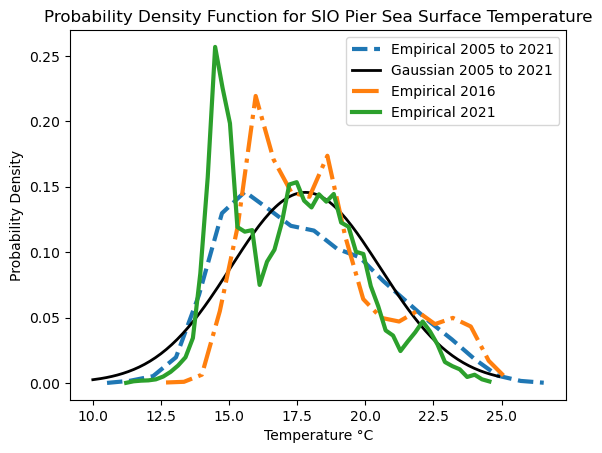

In [15]:
#PDF for whole year

hist0521, bins0521 = np.histogram(filtered_temperature, bins=20, density=True)
bin_centers0521 = (bins0521[:-1] + bins0521[1:]) / 2

#gausian of whole year
# Parameters for the Gaussian distribution
mu = np.mean(filtered_temperature)
sigma = np.std(filtered_temperature)

# Generate data points for the Gaussian distribution
x = np.arange(10, 25, 0.1)
gaussian0521 = 1.0 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

plt.plot(bin_centers0521, hist0521, label='Empirical 2005 to 2021', linestyle='--', linewidth=3)
plt.plot(x, gaussian0521, 'k-', label='Gaussian 2005 to 2021', linewidth=2)
plt.plot(bin_centers16, hist16, label='Empirical 2016', linestyle='-.', linewidth=3)
plt.plot(bin_centers, hist, label='Empirical 2021', linestyle='-', linewidth=3)


plt.legend()
plt.xlabel('Temperature °C')
plt.ylabel('Probability Density')
plt.title('Probability Density Function for SIO Pier Sea Surface Temperature')
plt.legend()

**Observations** 
Looking at the whole record from 2005 to 2021 the PDF widens more, and is more representivie across variuous temperatutes due to the larger sample size. The PDF of 2005 to 2021 is also no longer bimodal, but does not represent the gaussian. The peak of the PDF, ie the most common temperature is about 15.5°C which is right in between the 2016 and 2021 peaks. Most of the temperature values for 2005 to 2021 fall between 14 and 21°C. Again 2016 has the warmest temperatures due to the PDF being shift to the right, toawrds the higher temperatures